In [1]:
# Read in existing demo

import pickle

demo = pickle.load(open('/home/anton/Documents/Yale/HCP/demographics.pkl', 'rb'))

print('Done')

Done


In [2]:
# Get subs with all values

keepSubs = []

for sub in demo['Age_in_Yrs']:
    exclude = False
    for field in list(demo.keys()):
        if sub not in demo[field]:
            exclude = True
    if not exclude:
        keepSubs.append(sub)

print(len(keepSubs))

1067


In [3]:
# Get FC

import numpy as np

fcsPkl = pickle.load(open('/home/anton/Documents/Yale/HCP/fcs_ya.pkl', 'rb'))
fcs = []

for sub in keepSubs:
    sub = str(sub)
    if sub in fcsPkl:
        fcs.append(fcsPkl[sub])

x = np.stack(fcs)

print(len(x))

456


In [4]:
import sys

sys.path.append('/home/anton/Documents/Tulane/Research/demo-vae/pip/src/')

from demovae import DemoVAE

field = 'Total_Any_Tobacco_7days'

vae = DemoVAE(pperiod=50, use_cuda=True, nepochs=5000, latent_dim=100, weight_decay=0, lr=5e-5, loss_rec_mult=1e3,
              loss_pred_mult=0.01, loss_C_mult=1e4)
vae.load(f'/home/anton/Documents/Yale/HCP/VAE_Models/456_subs/{field}.pkl')

print('Done')

/home/anton/Documents/Tulane/Research/demo-vae/pip/src/demovae/sklearn.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dct = torch.load(path)


Done


In [5]:
import pickle

dct = pickle.load(open(f'/home/anton/Documents/Yale/HCP/VAE_Models/456_subs/demos_{field}.pkl', 'rb'))

print(list(dct.keys()))
print('Done')

['demos', 'types']
Done


In [6]:
import numpy as np

xx = vae.transform(len(dct['demos'][0]), dct['demos'], dct['types'])

print(len(xx))

456


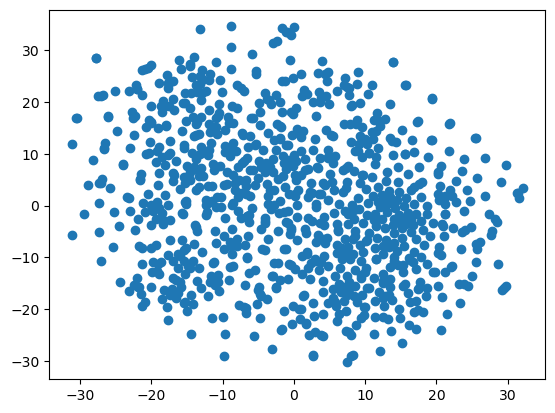

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

allx = np.concatenate([x, xx])

z = TSNE(n_components=2, perplexity=10).fit_transform(allx)
plt.scatter(z[:,0], z[:,1])

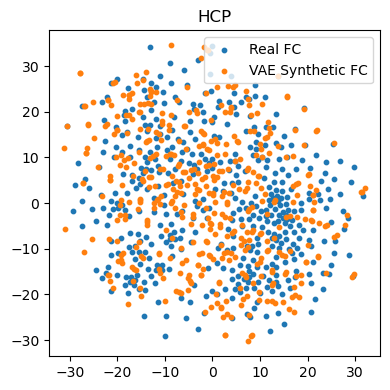

In [16]:
N = len(x)

fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.scatter(z[:N,0],z[:N,1],s=10,label='Real FC')
ax.scatter(z[N:,0],z[N:,1],s=10,label='VAE Synthetic FC')

ax.legend()
ax.set_title('HCP')

fig.tight_layout()
fig.savefig('/home/anton/Documents/Yale/HCP/Figures/HCP-tsne.pdf')
fig.show()